<a href="https://colab.research.google.com/github/claranatalie01/Hoax-News-Detection/blob/main/TSDN_Bayez_FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FINAL_Fake News Detection Modelling Using ML (MultinomialNB, Passive Aggressive, MultinomialNB hyper) & DL (LSTM, BI-LSTM, GRU, BI-GRU)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Pre-processing

In [ ]:
import pandas as pd

#### Insert Hoax Data

In [ ]:
data_hoax = pd.read_excel('dataset_turnbackhoax_10_cleaned.xlsx')
data_hoax.head()

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi,Clean Narasi,hoax
0,0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,1,\n“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,0,\n“ini bener gasih?? Ya Allah gimna keadaan pa...,ini bener gasih?? Ya Allah gimna keadaan pa ha...,1
2,2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,1,\n“Nenek lampir pemimpin partai banteng bercul...,Nenek lampir pemimpin partai banteng bercula s...,1
3,3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,0,\n“gerombolan kulup banyak menyusup ke ormas2 ...,gerombolan kulup banyak menyusup ke ormas2 isl...,1
4,4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,1,,NaN,1


In [ ]:
data_hoax = data_hoax[['Title','hoax']]
data_hoax.head()

,Title,hoax
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1


In [ ]:
print(data_hoax)

                                                   Title  hoax
0      [SALAH] Anies Baswedan Dekat Dengan Aliran Krs...     1
1      [SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...     1
2          [SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT     1
3      [SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...     1
4      [SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...     1
...                                                  ...   ...
10376  (HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...     1
10377  (HOAX) Jokowi dituduh bodoh, salah cara dalam ...     1
10378  (FITNAH) Jokowi dituduh memasukkan ribuan tena...     1
10379                   (HOAX) Mata Uang Rupiah Terpuruk     1
10380  (FITNAH) Ahok izinkan Natalan di Monas – tapi ...     1

[10381 rows x 2 columns]


In [ ]:
data_hoax.isnull().sum()

Title    0
hoax     0
dtype: int64

In [ ]:
# Data sebelum duplikasi dihapus
print(f'Number of rows before dropping duplicates: {len(data_hoax)}')

# Hapus duplikasi
data_hoax = data_hoax.drop_duplicates(subset=['Title'])

# Data setelah duplikasi dihapus
print(f'Number of rows after dropping duplicates: {len(data_hoax)}')

# Reset index untuk menyamakan indeks yang berantakan akibat adanya row yang dihapus
data_hoax_clean = data_hoax.reset_index(drop=True)

Number of rows before dropping duplicates: 10381
Number of rows after dropping duplicates: 10352


In [ ]:
print(data_hoax_clean)

                                                   Title  hoax
0      [SALAH] Anies Baswedan Dekat Dengan Aliran Krs...     1
1      [SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...     1
2          [SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT     1
3      [SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...     1
4      [SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...     1
...                                                  ...   ...
10347  (HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...     1
10348  (HOAX) Jokowi dituduh bodoh, salah cara dalam ...     1
10349  (FITNAH) Jokowi dituduh memasukkan ribuan tena...     1
10350                   (HOAX) Mata Uang Rupiah Terpuruk     1
10351  (FITNAH) Ahok izinkan Natalan di Monas – tapi ...     1

[10352 rows x 2 columns]


In [ ]:
import re

# Escape special characters in the keywords
keywords = [re.escape(keyword) for keyword in ['[SALAH]','(SALAH)', 'SALAH',
                                               '[HOAX]','(HOAX)', 'HOAX',
                                               '[FITNAH]', '(FITNAH)', 'FITNAH',
                                              '[MISINFORMASI]','MISINFORMASI','(MISINFORMASI)',
                                              '[DISINFORMASI]','DISINFORMASI','(DISINFORMASI)',
                                              'HASUT','[HASUT]','(HASUT)',
                                              'FALSE','[FALSE]','(FALSE)']]

# Create a regex pattern for matching any of the keywords
pattern = '|'.join(keywords)

# Create a boolean mask for rows containing any of the keywords
mask = data_hoax_clean['Title'].str.contains(pattern, case=True, regex=True)

# Apply the mask to filter the DataFrame
filtered_df = data_hoax_clean[mask]

# Display the filtered DataFrame
print(filtered_df)

                                                   Title  hoax
0      [SALAH] Anies Baswedan Dekat Dengan Aliran Krs...     1
1      [SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...     1
2          [SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT     1
3      [SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...     1
4      [SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...     1
...                                                  ...   ...
10347  (HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...     1
10348  (HOAX) Jokowi dituduh bodoh, salah cara dalam ...     1
10349  (FITNAH) Jokowi dituduh memasukkan ribuan tena...     1
10350                   (HOAX) Mata Uang Rupiah Terpuruk     1
10351  (FITNAH) Ahok izinkan Natalan di Monas – tapi ...     1

[9187 rows x 2 columns]


In [ ]:
# Assuming 'Title' is the column containing the news titles
words_to_remove = ['HOAX', 'FALSE', 'SALAH','MISINFORMASI','DISINFORMASI','FITNAH','HASUT','(',')','[',']',':']  # Add the words you want to remove to this list

for word in words_to_remove:
    filtered_df['Title'] = filtered_df['Title'].str.replace(word, '', case=False).str.strip()

# Display the DataFrame after removing the specified words
print(filtered_df)

                                                   Title  hoax
0      Anies Baswedan Dekat Dengan Aliran Krsiten Ses...     1
1      Hakim Wahyu Iman Santoso Alami Kecelakaan Tung...     1
2                  GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT     1
3      JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYUS...     1
4      PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG ...     1
...                                                  ...   ...
10347  Foto Raja Salman Mengangkat Tandu Jenazah Korb...     1
10348  Jokowi dituduh bodoh,  cara dalam bersalaman d...     1
10349  Jokowi dituduh memasukkan ribuan tenaga kerja ...     1
10350                          Mata Uang Rupiah Terpuruk     1
10351  Ahok izinkan Natalan di Monas – tapi larang pe...     1

[9187 rows x 2 columns]


/var/folders/tp/tz0b8xnj3p9b2n_4hvp6wkyh0000gn/T/ipykernel_1949/3255718785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Title'] = filtered_df['Title'].str.replace(word, '', case=False).str.strip()
/var/folders/tp/tz0b8xnj3p9b2n_4hvp6wkyh0000gn/T/ipykernel_1949/3255718785.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtered_df['Title'] = filtered_df['Title'].str.replace(word, '', case=False).str.strip()


In [ ]:
filtered_df.head()

,Title,hoax
0,Anies Baswedan Dekat Dengan Aliran Krsiten Ses...,1
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tung...,1
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYUS...,1
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG ...,1


In [ ]:
hoax_2 = pd.read_csv('Data_latih.csv')
print(hoax_2)

          ID  label    tanggal  \
0         71      1  17-Aug-20   
1        461      1  17-Jul-20   
2        495      1  13-Jul-20   
3        550      1   8-Jul-20   
4        681      1  24-Jun-20   
...      ...    ...        ...   
4226  999287      1  17-Jan-16   
4227  999472      1  20-Aug-20   
4228  999501      1  17-Aug-20   
4229  999848      1  21-Jul-20   
4230  999860      1  20-Jul-20   

                                                  judul  \
0     Pemakaian Masker Menyebabkan Penyakit Legionna...   
1     Instruksi Gubernur Jateng tentang penilangan  ...   
2     Foto Jim Rohn: Jokowi adalah presiden terbaik ...   
3     ini bukan politik, tapi kenyataan Pak Jokowi b...   
4          Foto Kadrun kalo lihat foto ini panas dingin   
...                                                 ...   
4226  : KPK Dilarang Membawa Brimob Bersenjata Masuk...   
4227            Foto pejabat keuangan dibawah palu arit   
4228  Gambar Denny Siregar Musuh Warga Tasikmalaya d...   
4

In [ ]:
hoax_2.isnull().sum()

ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64

In [ ]:
# Data sebelum duplikasi dihapus
print(f'Number of rows before dropping duplicates: {len(hoax_2)}')

# Hapus duplikasi
hoax_2 = hoax_2.drop_duplicates(subset=['judul'])

# Data setelah duplikasi dihapus
print(f'Number of rows after dropping duplicates: {len(hoax_2)}')

# Reset index untuk menyamakan indeks yang berantakan akibat adanya row yang dihapus
hoax_2_clean = hoax_2.reset_index(drop=True)

Number of rows before dropping duplicates: 4231
Number of rows after dropping duplicates: 4219


In [ ]:
hoax_2 = hoax_2[hoax_2['label'] == 1]
print(hoax_2)

          ID  label    tanggal  \
0         71      1  17-Aug-20   
1        461      1  17-Jul-20   
2        495      1  13-Jul-20   
3        550      1   8-Jul-20   
4        681      1  24-Jun-20   
...      ...    ...        ...   
4226  999287      1  17-Jan-16   
4227  999472      1  20-Aug-20   
4228  999501      1  17-Aug-20   
4229  999848      1  21-Jul-20   
4230  999860      1  20-Jul-20   

                                                  judul  \
0     Pemakaian Masker Menyebabkan Penyakit Legionna...   
1     Instruksi Gubernur Jateng tentang penilangan  ...   
2     Foto Jim Rohn: Jokowi adalah presiden terbaik ...   
3     ini bukan politik, tapi kenyataan Pak Jokowi b...   
4          Foto Kadrun kalo lihat foto ini panas dingin   
...                                                 ...   
4226  : KPK Dilarang Membawa Brimob Bersenjata Masuk...   
4227            Foto pejabat keuangan dibawah palu arit   
4228  Gambar Denny Siregar Musuh Warga Tasikmalaya d...   
4

In [ ]:
hoax_2 = hoax_2[['label','judul']]
hoax_2.head()

,label,judul
0,1,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,1,Instruksi Gubernur Jateng tentang penilangan ...
2,1,Foto Jim Rohn: Jokowi adalah presiden terbaik ...
3,1,"ini bukan politik, tapi kenyataan Pak Jokowi b..."
4,1,Foto Kadrun kalo lihat foto ini panas dingin


In [ ]:
# Assuming 'Title' is the column containing the news titles
words_to_remove = ['HOAX', 'FALSE', 'SALAH','MISINFORMASI','DISINFORMASI','FITNAH','HASUT','(',')','[',']',':']  # Add the words you want to remove to this list

for word in words_to_remove:
    hoax_2['judul'] = hoax_2['judul'].str.replace(word, '', case=False).str.strip()

# Display the DataFrame after removing the specified words
print(hoax_2)

      label                                              judul
0         1  Pemakaian Masker Menyebabkan Penyakit Legionna...
1         1  Instruksi Gubernur Jateng tentang penilangan  ...
2         1  Foto Jim Rohn Jokowi adalah presiden terbaik d...
3         1  ini bukan politik, tapi kenyataan Pak Jokowi b...
4         1       Foto Kadrun kalo lihat foto ini panas dingin
...     ...                                                ...
4226      1  KPK Dilarang Membawa Brimob Bersenjata Masuk G...
4227      1            Foto pejabat keuangan dibawah palu arit
4228      1  Gambar Denny Siregar Musuh Warga Tasikmalaya d...
4229      1  Kaesang Bapak Saya dengan Kesederhaan Bisa Nip...
4230      1  Laser dari termometer gun akan merusak struktu...

[3454 rows x 2 columns]


/var/folders/tp/tz0b8xnj3p9b2n_4hvp6wkyh0000gn/T/ipykernel_1949/2745300052.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hoax_2['judul'] = hoax_2['judul'].str.replace(word, '', case=False).str.strip()


Selanjutnya, Kami mengubah nama kolom untuk disamakan di csv opener

In [ ]:
import pandas as pd

In [ ]:
filtered_df = pd.read_csv('turnbackhoax_clean.csv')
print(filtered_df)

                                                  Title  hoax
0     Anies Baswedan Dekat Dengan Aliran Krsiten Ses...     1
1     Hakim Wahyu Iman Santoso Alami Kecelakaan Tung...     1
2                 GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT     1
3     JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYUS...     1
4     PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG ...     1
...                                                 ...   ...
9182  Foto Raja Salman Mengangkat Tandu Jenazah Korb...     1
9183  Jokowi dituduh bodoh,  cara dalam bersalaman d...     1
9184  Jokowi dituduh memasukkan ribuan tenaga kerja ...     1
9185                          Mata Uang Rupiah Terpuruk     1
9186  Ahok izinkan Natalan di Monas – tapi larang pe...     1

[9187 rows x 2 columns]


In [ ]:
filtered_df = filtered_df[['Title']]
filtered_df.head()

,Title
0,Anies Baswedan Dekat Dengan Aliran Krsiten Ses...
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tung...
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYUS...
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG ...


In [ ]:
hoax_2 = pd.read_csv('data_latih_clean.csv')
print(hoax_2)

      label                                              judul
0         1  Pemakaian Masker Menyebabkan Penyakit Legionna...
1         1  Instruksi Gubernur Jateng tentang penilangan  ...
2         1  Foto Jim Rohn Jokowi adalah presiden terbaik d...
3         1  ini bukan politik, tapi kenyataan Pak Jokowi b...
4         1       Foto Kadrun kalo lihat foto ini panas dingin
...     ...                                                ...
3449      1  KPK Dilarang Membawa Brimob Bersenjata Masuk G...
3450      1            Foto pejabat keuangan dibawah palu arit
3451      1  Gambar Denny Siregar Musuh Warga Tasikmalaya d...
3452      1  Kaesang Bapak Saya dengan Kesederhaan Bisa Nip...
3453      1  Laser dari termometer gun akan merusak struktu...

[3454 rows x 2 columns]


In [ ]:
hoax_2 = hoax_2[['judul']]
hoax_2.head()

,judul
0,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,Instruksi Gubernur Jateng tentang penilangan ...
2,Foto Jim Rohn Jokowi adalah presiden terbaik d...
3,"ini bukan politik, tapi kenyataan Pak Jokowi b..."
4,Foto Kadrun kalo lihat foto ini panas dingin


In [ ]:
hoax_2[['Title']] = hoax_2[['judul']]
hoax_2.head()

,judul,Title
0,Pemakaian Masker Menyebabkan Penyakit Legionna...,Pemakaian Masker Menyebabkan Penyakit Legionna...
1,Instruksi Gubernur Jateng tentang penilangan ...,Instruksi Gubernur Jateng tentang penilangan ...
2,Foto Jim Rohn Jokowi adalah presiden terbaik d...,Foto Jim Rohn Jokowi adalah presiden terbaik d...
3,"ini bukan politik, tapi kenyataan Pak Jokowi b...","ini bukan politik, tapi kenyataan Pak Jokowi b..."
4,Foto Kadrun kalo lihat foto ini panas dingin,Foto Kadrun kalo lihat foto ini panas dingin


In [ ]:
hoax_2 = hoax_2[['Title']]
print(hoax_2)

                                                  Title
0     Pemakaian Masker Menyebabkan Penyakit Legionna...
1     Instruksi Gubernur Jateng tentang penilangan  ...
2     Foto Jim Rohn Jokowi adalah presiden terbaik d...
3     ini bukan politik, tapi kenyataan Pak Jokowi b...
4          Foto Kadrun kalo lihat foto ini panas dingin
...                                                 ...
3449  KPK Dilarang Membawa Brimob Bersenjata Masuk G...
3450            Foto pejabat keuangan dibawah palu arit
3451  Gambar Denny Siregar Musuh Warga Tasikmalaya d...
3452  Kaesang Bapak Saya dengan Kesederhaan Bisa Nip...
3453  Laser dari termometer gun akan merusak struktu...

[3454 rows x 1 columns]


In [ ]:
df_hoax = pd.concat([filtered_df, hoax_2], ignore_index=True)
print(df_hoax)

                                                   Title
0      Anies Baswedan Dekat Dengan Aliran Krsiten Ses...
1      Hakim Wahyu Iman Santoso Alami Kecelakaan Tung...
2                  GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT
3      JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYUS...
4      PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG ...
...                                                  ...
12636  KPK Dilarang Membawa Brimob Bersenjata Masuk G...
12637            Foto pejabat keuangan dibawah palu arit
12638  Gambar Denny Siregar Musuh Warga Tasikmalaya d...
12639  Kaesang Bapak Saya dengan Kesederhaan Bisa Nip...
12640  Laser dari termometer gun akan merusak struktu...

[12641 rows x 1 columns]


In [ ]:
df_hoax.isnull().sum()

Title    0
dtype: int64

In [ ]:
# Data sebelum duplikasi dihapus
print(f'Number of rows before dropping duplicates: {len(df_hoax)}')

# Hapus duplikasi
df_hoax = df_hoax.drop_duplicates(subset=['Title'])

# Data setelah duplikasi dihapus
print(f'Number of rows after dropping duplicates: {len(df_hoax)}')

# Reset index untuk menyamakan indeks yang berantakan akibat adanya row yang dihapus
df_hoax_clean = df_hoax.reset_index(drop=True)

Number of rows before dropping duplicates: 12641
Number of rows after dropping duplicates: 11059


In [ ]:
print(df_hoax_clean)

                                                   Title
0      Anies Baswedan Dekat Dengan Aliran Krsiten Ses...
1      Hakim Wahyu Iman Santoso Alami Kecelakaan Tung...
2                  GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT
3      JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYUS...
4      PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG ...
...                                                  ...
11054  Orang-orang China di Terminal 1C Cengkareng Ma...
11055  Pengacara Hotman Paris Hutapea Jadi Kuasa Huku...
11056  Aksi Kita Indonesia Tandingan dari Aksi Bela I...
11057            Foto pejabat keuangan dibawah palu arit
11058  Kaesang Bapak Saya dengan Kesederhaan Bisa Nip...

[11059 rows x 1 columns]


## Insert Valid Data

#### Insert data politik sekitar 2100

In [ ]:
cnn = pd.read_excel('dataset_cnn_10k_cleaned.xlsx')
tem = pd.read_excel('dataset_tempo_6k_cleaned.xlsx')
kom = pd.read_excel('dataset_kompas_4k_cleaned.xlsx')

In [ ]:
df_cnn = cnn.sample(n=700, random_state=42)  # Set a random_state for reproducibility
df_tem = tem.sample(n=700, random_state=42) #ambil 700 data politik tiap dataframe
df_kom = kom.sample(n=700, random_state=42)

In [ ]:
df_cnn = df_cnn.reset_index()
df_tem = df_tem.reset_index()
df_kom= df_kom.reset_index()

In [ ]:
df_cnn.head()

,index,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,119,120,Partai Buruh Bantah Terlibat Dugaan Manipulasi...,"Rabu, 15 Feb 2023 12:31 WIB","Jakarta, CNN Indonesia -- Presiden Partai Buru...",partai buruh;pemilu 2024;kpu,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230215...,Partai Buruh Bantah Terlibat Dugaan Manipulasi...,0
1,4420,4588,KPU Luncurkan Sipol untuk Pendaftaran Parpol d...,"Jumat, 24 Jun 2022 17:35 WIB","Jakarta, CNN Indonesia -- Komisi Pemilihan Umu...",kpu;sipol kpu;pemilu 2024;pilpres 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20220624...,KPU Luncurkan Sipol untuk Pendaftaran Parpol d...,0
2,971,999,"Mahfud Vs Rizal Ramli, Twitwar Caper Minim Sub...","Jumat, 06 Jan 2023 09:23 WIB","Jakarta, CNN Indonesia -- Baru-baru ini jagat ...",mahfud md;rizal ramli;mahfud vs rizal ramli;tw...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230106...,"Mahfud Vs Rizal Ramli, Twitwar Caper Minim Sub...",0
3,2098,2174,Luhut Tolak Tawaran Jadi Cawapres Pendamping A...,"Sabtu, 29 Okt 2022 18:25 WIB","Jakarta, CNN Indonesia -- Menteri Koordinator ...",luhut binsar pandjaitan;anies baswedan;luhut p...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20221029...,Luhut Tolak Tawaran Jadi Cawapres Pendamping A...,0
4,7442,7725,"DPR Ubah Tatib terkait Pansus RUU IKN, Pengama...","Jumat, 10 Des 2021 21:03 WIB","Jakarta, CNN Indonesia -- Direktur Indonesian ...",dpr;pansus ruu ikn;ruu ikn;ikn;ibu kota negara...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20211210...,"DPR Ubah Tatib terkait Pansus RUU IKN, Pengama...",0


In [ ]:
print(df_cnn)

     index  Unnamed: 0                                              Title  \
0      119         120  Partai Buruh Bantah Terlibat Dugaan Manipulasi...   
1     4420        4588  KPU Luncurkan Sipol untuk Pendaftaran Parpol d...   
2      971         999  Mahfud Vs Rizal Ramli, Twitwar Caper Minim Sub...   
3     2098        2174  Luhut Tolak Tawaran Jadi Cawapres Pendamping A...   
4     7442        7725  DPR Ubah Tatib terkait Pansus RUU IKN, Pengama...   
..     ...         ...                                                ...   
695   5404        5608  Gerindra DKI Minta Anies Patuh Aturan Penamaan...   
696   5121        5314  Sinyal Jokowi Dukung Ganjar, PDIP Anggap Sebat...   
697   6377        6613  PDIP Tegaskan Tak ada Ruang Bagi Penundaan Pem...   
698   1295        1335  Fakta Rumah Jokowi di Colomadu: 3.000 Meter Pe...   
699   1595        1653  APBD DKI 2023 Diketok Rp83,7 Triliun, Priorita...   

                         Timestamp  \
0      Rabu, 15 Feb 2023 12:31 WIB   

In [ ]:
df_cnn = df_cnn[['Title']]
df_tem = df_tem[['Title']]
df_kom= df_kom[['Title']]

In [ ]:
print(df_tem)

                                                 Title
0    Wamenkumham Ungkap Alasan Belum Buka Draf RKUH...
1    Kader PDIP Getol Dorong Menteri Partai NasDem ...
2    Tolak Wacana Hadirkan PPHN Lewat Konvensi Keta...
3    Luhut Bicara Penundaan Pemilu: Kenapa Buru-bur...
4    Menanggapi Kenaikan Harga BBM, Ketua BEM Unpad...
..                                                 ...
695  Heru Tiap Hari Ketemu Jokowi, Tapi Klaim Belum...
696  Meski Effendi Simbolon Sudah Minta Maaf, Pelap...
697  KPU: Pendaftaran Parpol Pemilu 2024 Mulai 1 Ag...
698  PDSI Telah Meminta Terawan agar Bersedia Jadi ...
699  Puan Maharani Minta Pemerintah Segera Susun At...

[700 rows x 1 columns]


In [ ]:
df_politics = pd.concat([df_cnn, df_tem, df_kom], ignore_index=True)
print(df_politics)

                                                  Title
0     Partai Buruh Bantah Terlibat Dugaan Manipulasi...
1     KPU Luncurkan Sipol untuk Pendaftaran Parpol d...
2     Mahfud Vs Rizal Ramli, Twitwar Caper Minim Sub...
3     Luhut Tolak Tawaran Jadi Cawapres Pendamping A...
4     DPR Ubah Tatib terkait Pansus RUU IKN, Pengama...
...                                                 ...
2095  Selain Temui SBY, Wiranto Juga Akan Temui Pimp...
2096  Ketua MPR Minta Semua Pihak Sambut Pemilu deng...
2097  [HOAKS] Prabowo Dukung Anies Baswedan sebagai ...
2098  KSP Ingatkan KAMI Tak Bermanuver Politik di Te...
2099  Posisi PM Malaysia Muhyiddin Kritis, Siapa Cal...

[2100 rows x 1 columns]


In [ ]:
df_politics.isnull().sum()

Title    4
dtype: int64

In [ ]:
df_politics = df_politics.dropna()
# Reset the index if needed
df_politics = df_politics.reset_index(drop=True)

In [ ]:
df_politics.isnull().sum()

Title    0
dtype: int64

In [ ]:
# Data sebelum duplikasi dihapus
print(f'Number of rows before dropping duplicates: {len(df_politics)}')

# Hapus duplikasi
df_politics = df_politics.drop_duplicates(subset=['Title'])

# Data setelah duplikasi dihapus
print(f'Number of rows after dropping duplicates: {len(df_politics)}')

# Reset index untuk menyamakan indeks yang berantakan akibat adanya row yang dihapus
df_politics = df_politics.reset_index(drop=True)

Number of rows before dropping duplicates: 2096
Number of rows after dropping duplicates: 2096


#### Insert the non politics

In [ ]:
df_valid = pd.read_csv('data.csv')
print(df_valid)

          id    source                                              title  \
0         83     tempo  Depo Plumpang Terbakar, Anggota DPR Minta Pert...   
1         84     tempo  Jokowi Perintahkan Wapres Ma'ruf Amin Tinjau L...   
2         85     tempo  HNW Mendukung Jamaah Umroh First Travel Dapatk...   
3         86     tempo  Tim Dokkes Polri Telah Terima 14 Kantong Jenaz...   
4         87     tempo  Bamsoet Ajak Komunitas Otomotif Kembangkan Per...   
...      ...       ...                                                ...   
32730  63563  kumparan  5 Hewan Aneh yang Hidup di Palung Mariana, Sal...   
32731  63564  kumparan  Biadab! Guru SD di Banyuwangi Cabuli Siswinya,...   
32732  63565  kumparan  Aji Santoso: Jakmania Perlakukan Persebaya den...   
32733  63566  kumparan  Sopir Audi Cium Kaki Ibu & Istri Hamil Usai Si...   
32734  63567     tempo          Ini Besaran Biaya Haji 2023 per Embarkasi   

                                                   image  \
0      https://

In [ ]:
# hapus yang bersumber dari tempo dan cnn
df_valid = df_valid[~df_valid['source'].str.contains('tempo|cnnindonesia', case=False)]

# Reset the index if needed
df_valid = df_valid.reset_index(drop=True)
print(df_valid)

          id         source  \
0       3623  cnbcindonesia   
1       3624  cnbcindonesia   
2       3625  cnbcindonesia   
3       3626  cnbcindonesia   
4       3627  cnbcindonesia   
...      ...            ...   
25350  63562        okezone   
25351  63563       kumparan   
25352  63564       kumparan   
25353  63565       kumparan   
25354  63566       kumparan   

                                                   title  \
0      Intip Harga Terbaru BBM di Seluruh SPBU Pertam...   
1      Terbongkar! PNS Pajak Wahono Saputro Kongsi Er...   
2      Intelijen AS Ramal Rusia Sulit Kuasai Wilayah ...   
3      Aturan Berubah! Pasang PLTA Atap Tak Bisa Jual...   
4      Wow, 2 Wilayah RI Ini Simpan 'Harta Karun' Ber...   
...                                                  ...   
25350  Kisah Keji PKI Bantai Pelajar Sekaligus Atlet ...   
25351  5 Hewan Aneh yang Hidup di Palung Mariana, Sal...   
25352  Biadab! Guru SD di Banyuwangi Cabuli Siswinya,...   
25353  Aji Santoso: Jakmani

In [ ]:
df_valid.isnull().sum()

id              0
source          0
title           0
image         160
url             0
content       194
date            0
embedding       0
created_at      0
updated_at      0
summary         0
dtype: int64

null value tidak dibuang karena kami hanya menggunakan column title

In [ ]:
# Data sebelum duplikasi dihapus
print(f'Number of rows before dropping duplicates: {len(df_valid)}')

# Hapus duplikasi
df_valid = df_valid.drop_duplicates(subset=['title'])

# Data setelah duplikasi dihapus
print(f'Number of rows after dropping duplicates: {len(df_valid)}')

# Reset index untuk menyamakan indeks yang berantakan akibat adanya row yang dihapus
df_valid = df_valid.reset_index(drop=True)

Number of rows before dropping duplicates: 25355
Number of rows after dropping duplicates: 25304


In [ ]:
# ambil secara acak sekitar 8845
df_valid = df_valid.sample(n=8845, random_state=42)
df_valid.reset_index()

,index,id,source,title,image,url,content,date,embedding,created_at,updated_at,summary
0,11451,39311,kumparan,Telkomsel Berbagi Bantuan ke Ribuan Duafa: Sem...,https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/kumparantech/telkomsel-be...,kembali menyelenggarakan rangkaian program Cor...,2023-03-28 11:59:47+00,"[0.0023388916,-0.024523025,-0.0042734495,-0.01...",2023-03-28 12:20:18.403579,2023-03-28 12:20:18.403579,Telkomsel membagikan paket buka puasa/sahur gr...
1,15419,37506,okezone,Emiten Wulan Guritno (LUCY) Segera Rights Issu...,https://img.okezone.com/dynamic/content/2023/0...,https://economy.okezone.com/read/2023/03/26/27...,JAKARTA - PT Lima Dua Lima Tiga Tbk (LUCY) ber...,2023-03-26 03:11:04+00,"[0.0010895402,-0.020605806,-0.0019025808,-0.02...",2023-03-28 00:15:11.966095,2023-03-28 00:15:11.966095,Lucy in the Sky berencana melakukan right issu...
2,23677,61043,kumparan,Ini Skema Penyeberangan Arus Mudik dan Balik d...,https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/lampunggeh/ini-skema-peny...,- Pemerintah pusat melalui Direktur Jenderal P...,2023-04-10 12:12:23+00,"[0.009020077,-0.014292236,0.0035532636,-0.0002...",2023-04-10 12:20:13.321879,2023-04-10 12:20:13.321879,Direktur Jenderal Perhubungan Darat dan Bina M...
3,8267,18553,jawapos,"Gelar Program Mudik Gratis, Kemenhub Kucurkan ...",https://cdn-asset.jawapos.com/wp-content/uploa...,https://www.jawapos.com/ekonomi/15/03/2023/gel...,Kementerian Perhubungan (Kemenhub) melalui Di...,2023-03-15 11:25:12+00,"[0.007981237,-0.017863711,-0.003957611,-0.0185...",2023-03-19 00:33:26.163749,2023-03-19 00:33:26.163749,Kementerian Perhubungan melalui Ditjen Hubdat ...
4,9922,26282,suara,Gerindra Minta Pemerintah Jaga Harga Bahan Pok...,https://media.suara.com/pictures/970x544/2023/...,https://www.suara.com/news/2023/03/22/103454/g...,Suara.com - Sekjen Partai Gerindra Ahmad Muza...,2023-03-22 03:34:54+00,"[0.006636284,-0.0123969475,0.0025709018,0.0053...",2023-03-22 03:55:18.834114,2023-03-22 03:55:18.834114,"Ahmad Muzani, Sekjen Partai Gerindra mendorong..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8840,8568,25479,okezone,"8 Merek Motor Listrik Dapat Subsidi, Ini Dafta...",https://img.okezone.com/dynamic/content/2023/0...,https://economy.okezone.com/read/2023/03/20/32...,"JAKARTA - Direktur Jenderal Industri Logam, Me...",2023-03-20 14:02:40+00,"[-0.0058791493,-0.021187434,0.003353133,-0.022...",2023-03-22 00:15:11.938407,2023-03-22 00:15:11.938407,Kemenperin mengumumkan bahwa ada 8 merek motor...
8841,6311,25970,suara,"Ganti 20 Pejabat Pemprov DKI, Sekda Bantah Her...",https://media.suara.com/pictures/970x544/2023/...,https://www.suara.com/news/2023/03/21/192145/g...,Suara.com - Sekretaris Daerah (Sekda) DKI Jaka...,2023-03-21 12:21:45+00,"[-0.0026386292,-0.025840368,-0.001693012,-0.01...",2023-03-22 00:25:17.179403,2023-03-22 00:25:17.179403,"Sekda DKI Jakarta, Joko Agus Setyono, menyatak..."
8842,12400,29618,kumparan,Foto: Masjid Istiqlal Menyediakan Ribuan Menu ...,https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/kumparannews/foto-masjid-...,Ribuan umat menikmati hidangan pada kegiatan b...,2023-03-24 00:36:34+00,"[0.011756644,-0.036098592,-0.019214602,-0.0079...",2023-03-24 00:50:13.077836,2023-03-24 00:50:13.077836,Masjid Istiqlal Jakarta menyediakan ribuan men...
8843,23065,59858,okezone,"5 Fakta Perdagangan Orang di Batam, Libatkan O...",https://img.okezone.com/dynamic/content/2023/0...,https://nasional.okezone.com/read/2023/04/08/3...,BATAM - Geger sindikat perdagangan orang yang...,2023-04-08 20:00:01+00,"[-0.009445828,-0.02266734,0.008730437,-0.03081...",2023-04-10 00:15:12.714745,2023-04-10 00:15:12.714745,Sindikat perdagangan orang melibatkan oknum pe...


In [ ]:
df_valid = df_valid[['title']]
print(df_valid)

                                                   title
11451  Telkomsel Berbagi Bantuan ke Ribuan Duafa: Sem...
15419  Emiten Wulan Guritno (LUCY) Segera Rights Issu...
23677  Ini Skema Penyeberangan Arus Mudik dan Balik d...
8267   Gelar Program Mudik Gratis, Kemenhub Kucurkan ...
9922   Gerindra Minta Pemerintah Jaga Harga Bahan Pok...
...                                                  ...
8568   8 Merek Motor Listrik Dapat Subsidi, Ini Dafta...
6311   Ganti 20 Pejabat Pemprov DKI, Sekda Bantah Her...
12400  Foto: Masjid Istiqlal Menyediakan Ribuan Menu ...
23065  5 Fakta Perdagangan Orang di Batam, Libatkan O...
23798  Ngeri! Potret Bangunan Runtuh Akibat Ledakan P...

[8845 rows x 1 columns]


In [ ]:
df_valid['Title'] = df_valid['title']
print(df_valid)

                                                   title  \
11451  Telkomsel Berbagi Bantuan ke Ribuan Duafa: Sem...   
15419  Emiten Wulan Guritno (LUCY) Segera Rights Issu...   
23677  Ini Skema Penyeberangan Arus Mudik dan Balik d...   
8267   Gelar Program Mudik Gratis, Kemenhub Kucurkan ...   
9922   Gerindra Minta Pemerintah Jaga Harga Bahan Pok...   
...                                                  ...   
8568   8 Merek Motor Listrik Dapat Subsidi, Ini Dafta...   
6311   Ganti 20 Pejabat Pemprov DKI, Sekda Bantah Her...   
12400  Foto: Masjid Istiqlal Menyediakan Ribuan Menu ...   
23065  5 Fakta Perdagangan Orang di Batam, Libatkan O...   
23798  Ngeri! Potret Bangunan Runtuh Akibat Ledakan P...   

                                                   Title  
11451  Telkomsel Berbagi Bantuan ke Ribuan Duafa: Sem...  
15419  Emiten Wulan Guritno (LUCY) Segera Rights Issu...  
23677  Ini Skema Penyeberangan Arus Mudik dan Balik d...  
8267   Gelar Program Mudik Gratis, Kemenhub

In [ ]:
df_valid = df_valid[['Title']]
df_valid.head()

,Title
11451,Telkomsel Berbagi Bantuan ke Ribuan Duafa: Sem...
15419,Emiten Wulan Guritno (LUCY) Segera Rights Issu...
23677,Ini Skema Penyeberangan Arus Mudik dan Balik d...
8267,"Gelar Program Mudik Gratis, Kemenhub Kucurkan ..."
9922,Gerindra Minta Pemerintah Jaga Harga Bahan Pok...


#### menggabungkan dengan data politics

In [ ]:
df_headline_news = pd.concat([df_politics, df_valid], ignore_index=True)
print(df_headline_news)

                                                   Title
0      Partai Buruh Bantah Terlibat Dugaan Manipulasi...
1      KPU Luncurkan Sipol untuk Pendaftaran Parpol d...
2      Mahfud Vs Rizal Ramli, Twitwar Caper Minim Sub...
3      Luhut Tolak Tawaran Jadi Cawapres Pendamping A...
4      DPR Ubah Tatib terkait Pansus RUU IKN, Pengama...
...                                                  ...
10936  8 Merek Motor Listrik Dapat Subsidi, Ini Dafta...
10937  Ganti 20 Pejabat Pemprov DKI, Sekda Bantah Her...
10938  Foto: Masjid Istiqlal Menyediakan Ribuan Menu ...
10939  5 Fakta Perdagangan Orang di Batam, Libatkan O...
10940  Ngeri! Potret Bangunan Runtuh Akibat Ledakan P...

[10941 rows x 1 columns]


#### Memberikan label kepada masing-masing dataset

In [ ]:
# label 0 = valid, 1 = hoax
df_headline_news['label'] = 0
df_hoax_clean['label'] = 1

In [ ]:
df_headline_news.head()

,Title,label
0,Partai Buruh Bantah Terlibat Dugaan Manipulasi...,0
1,KPU Luncurkan Sipol untuk Pendaftaran Parpol d...,0
2,"Mahfud Vs Rizal Ramli, Twitwar Caper Minim Sub...",0
3,Luhut Tolak Tawaran Jadi Cawapres Pendamping A...,0
4,"DPR Ubah Tatib terkait Pansus RUU IKN, Pengama...",0


In [ ]:
df_hoax_clean.head()

,Title,label
0,Anies Baswedan Dekat Dengan Aliran Krsiten Ses...,1
1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tung...,1
2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1
3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYUS...,1
4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG ...,1


#### Menggabungkan keseluruhan dataset

In [ ]:
df = pd.concat([df_headline_news, df_hoax_clean], ignore_index=True)
print(df)

                                                   Title  label
0      Partai Buruh Bantah Terlibat Dugaan Manipulasi...      0
1      KPU Luncurkan Sipol untuk Pendaftaran Parpol d...      0
2      Mahfud Vs Rizal Ramli, Twitwar Caper Minim Sub...      0
3      Luhut Tolak Tawaran Jadi Cawapres Pendamping A...      0
4      DPR Ubah Tatib terkait Pansus RUU IKN, Pengama...      0
...                                                  ...    ...
21995  Orang-orang China di Terminal 1C Cengkareng Ma...      1
21996  Pengacara Hotman Paris Hutapea Jadi Kuasa Huku...      1
21997  Aksi Kita Indonesia Tandingan dari Aksi Bela I...      1
21998            Foto pejabat keuangan dibawah palu arit      1
21999  Kaesang Bapak Saya dengan Kesederhaan Bisa Nip...      1

[22000 rows x 2 columns]


In [ ]:
df.head()

,Title,label
0,Partai Buruh Bantah Terlibat Dugaan Manipulasi...,0
1,KPU Luncurkan Sipol untuk Pendaftaran Parpol d...,0
2,"Mahfud Vs Rizal Ramli, Twitwar Caper Minim Sub...",0
3,Luhut Tolak Tawaran Jadi Cawapres Pendamping A...,0
4,"DPR Ubah Tatib terkait Pansus RUU IKN, Pengama...",0


In [ ]:
#check adanya missing value
df.isnull().sum()

Title    0
label    0
dtype: int64

In [ ]:
# Data sebelum duplikasi dihapus
print(f'Number of rows before dropping duplicates: {len(df)}')

# Hapus duplikasi
df = df.drop_duplicates(subset=['Title'])

# Data setelah duplikasi dihapus
print(f'Number of rows after dropping duplicates: {len(df)}')

# Reset index untuk menyamakan indeks yang berantakan akibat adanya row yang dihapus
df = df.reset_index(drop=True)

Number of rows before dropping duplicates: 22000
Number of rows after dropping duplicates: 22000


In [ ]:
msg = df.copy

In [ ]:
## Membuat variabel independen

X=df.drop(['label'],axis=1)
X.head()

,Title
0,Partai Buruh Bantah Terlibat Dugaan Manipulasi...
1,KPU Luncurkan Sipol untuk Pendaftaran Parpol d...
2,"Mahfud Vs Rizal Ramli, Twitwar Caper Minim Sub..."
3,Luhut Tolak Tawaran Jadi Cawapres Pendamping A...
4,"DPR Ubah Tatib terkait Pansus RUU IKN, Pengama..."


In [ ]:
## Membuat variabel label
y=df['label']

In [ ]:
X.shape

(22000, 1)

In [ ]:
y.shape

(22000,)

In [ ]:
### Vocabulary size
voc_size=1000

In [ ]:
#install nltk untuk preprocessing
pip install nltk

SyntaxError: invalid syntax (2685185168.py, line 2)

In [ ]:
# Panggil stopwords untuk membuang kata penghubung yang tidak penting saat pre pro
from nltk.corpus import stopwords
import re

### Using Machine Learning Algorithm (Multinomial Naive Bayes, Passive Agrressive, MultinomialNB Hyperparameter)

In [ ]:
# menggunakan CountVectorizer dan TfidfVectorizer untuk melakukan tokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Copy data untuk membuat corpus
msg = df.copy()

In [ ]:
# Install Sastrawi (library untuk stemming data, sehingga meaning dari kata-kata berbahasa bisa ditangkap)
pip install PySastrawi


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import sastrawi untuk stemming dan building model
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import re

ft = StemmerFactory()
stemmer = ft.create_stemmer()  # Create Sastrawi stemmer

ml_corpus = []

for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', msg['Title'][i])
    review = review.lower()
    review = review.split()

    # Apply Sastrawi stemmer to each word
    stemmed_words = [stemmer.stem(word) for word in review if word not in stopwords.words('indonesian')]

    # Join the stemmed words into a single string
    stemmed_review = ' '.join(stemmed_words)

    ml_corpus.append(stemmed_review)

Sastrawi digunakan untuk stemming, hal ini dilakukan untuk memberikan makna tertentu pada kata dan membuang beberapa kata penghubung dan kata-kata yang tidak banyak mengandung arti, dampaknya adalah komputasi lebih efisien dan dari segi akurasi tidak ada perbedaan signifikan ketimbang tanpa menggunakan stemming

In [ ]:
ml_corpus[3]

'luhut tolak tawar cawapres damping anies'

In [ ]:
## Applying Countvectorizer
cv = CountVectorizer(max_features=1000,ngram_range=(1,3))
X_cv = cv.fit_transform(ml_corpus).toarray()

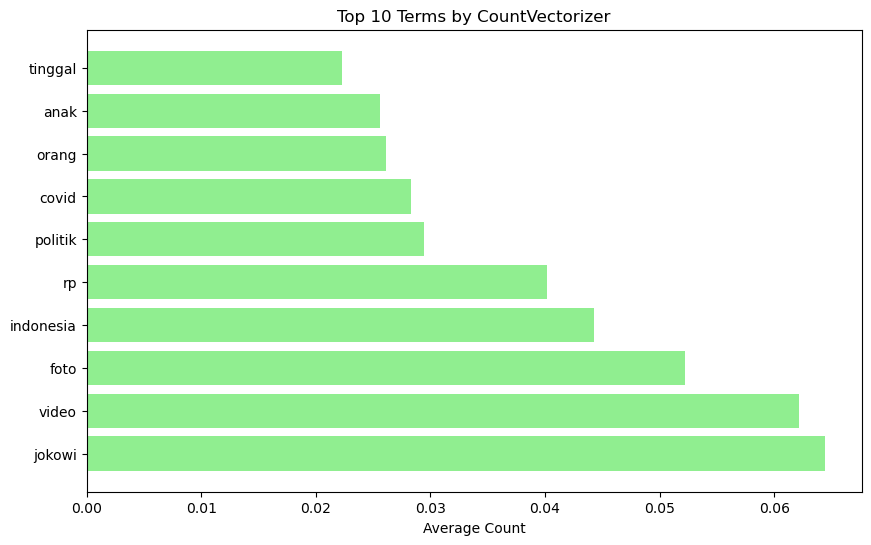

In [ ]:
import matplotlib.pyplot as plt

# Get feature names (terms)
feature_names_cv = cv.get_feature_names_out()

# Calculate the average count for each term across all documents
average_counts = X_cv.mean(axis=0)

# Get indices of top N terms with the highest average counts
N = 10  # Adjust N according to your preference
top_indices_cv = average_counts.argsort()[-N:][::-1]

# Get corresponding terms and counts
top_terms_cv = [feature_names_cv[i] for i in top_indices_cv]
top_counts_cv = [average_counts[i] for i in top_indices_cv]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_terms_cv, top_counts_cv, color='lightgreen')
plt.xlabel('Average Count')
plt.title('Top {} Terms by CountVectorizer'.format(N))
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))
X_tv = tv.fit_transform(ml_corpus).toarray()

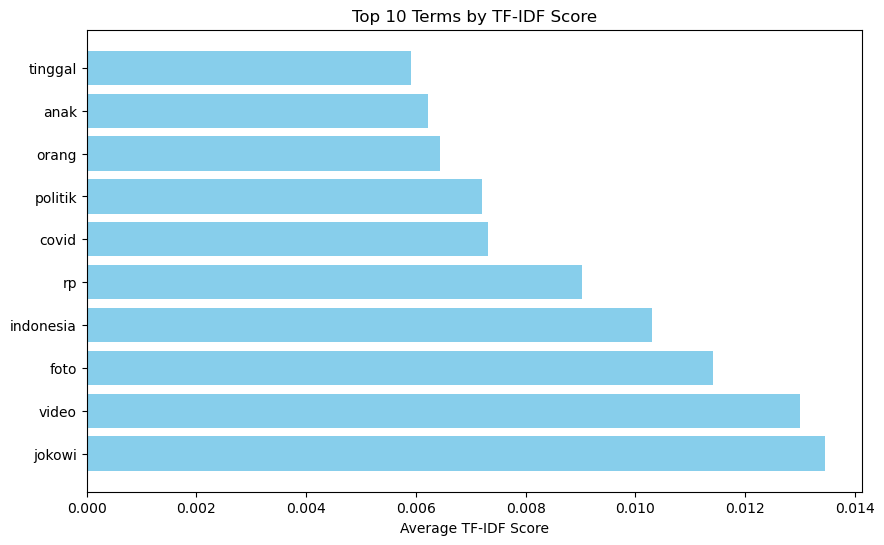

In [ ]:
# visualize tfidf
import matplotlib.pyplot as plt


# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(ml_corpus)

# Get feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate the average TF-IDF score for each term across all documents
average_tfidf_scores = tfidf_matrix.mean(axis=0).A1

# Get indices of top N terms with the highest average TF-IDF scores
N = 10  # Adjust N according to your preference
top_indices = average_tfidf_scores.argsort()[-N:][::-1]

# Get corresponding terms and scores
top_terms = [feature_names[i] for i in top_indices]
top_scores = [average_tfidf_scores[i] for i in top_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_terms, top_scores, color='skyblue')
plt.xlabel('Average TF-IDF Score')
plt.title('Top {} Terms by TF-IDF Score'.format(N))
plt.show()


Jadi, kami menggunakan TfidfVectorizer sebagai tokenizer, karena memiliki performa yang sedikit lebih baik dari CountVectorizer

In [ ]:
# memastikan jumlah data dan fitur max yang dibentuk oleh tokenizer
X_tv.shape

(22000, 1000)

In [ ]:
# memisahkan y sbg variabel dependen
y_tv=msg['label']

#### Split data

In [ ]:
import numpy as np

# Set the random seed
random_seed = 42
np.random.seed(random_seed)

In [ ]:
# K = 10 fold Cross Validation
from sklearn.model_selection import train_test_split
#60% data latih, 20% data validasi, dan 20% data uji

# Split data into train and temporary test
X_temp, X_test, y_temp, y_test = train_test_split(X_tv, y_tv, test_size=0.2, random_state=42)

# Split temporary test data into validation and test data
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [ ]:
# Resample training data using SMOTE
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after resampling
#unique, counts = np.unique(y_train, return_counts=True)
#print("Before resampling:")
#print(dict(zip(unique, counts)))

#unique, counts = np.unique(y_train_resampled, return_counts=True)
#print("After resampling:")
#print(dict(zip(unique, counts)))


In [ ]:
# Contoh nama-nama fitur yang dihasilkan dari TfidfVectorizer
feature_names = tv.get_feature_names_out()
print(feature_names[:20])

['acara' 'aceh' 'adil' 'ag' 'agama' 'agung' 'agustus' 'ahmad' 'ahok' 'ahy'
 'air' 'airlangga' 'aja' 'ajak' 'ajar' 'akibat' 'aksi' 'aku' 'akun'
 'akun facebook']


In [ ]:
# memanggil parameter dalam TfidfVectorizer
tv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=tv.get_feature_names_out())

In [ ]:
count_df.head()

,acara,aceh,adil,ag,agama,agung,agustus,ahmad,ahok,ahy,...,warga,warna,waspada,whatsapp,whatsapp wakil,who,wilayah,ya,yg,zakat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# import pyplot untuk membuat tabel confusion matrix
import matplotlib.pyplot as plt

In [ ]:
# Fungsi untuk tabel Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment= "center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Multinomial Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

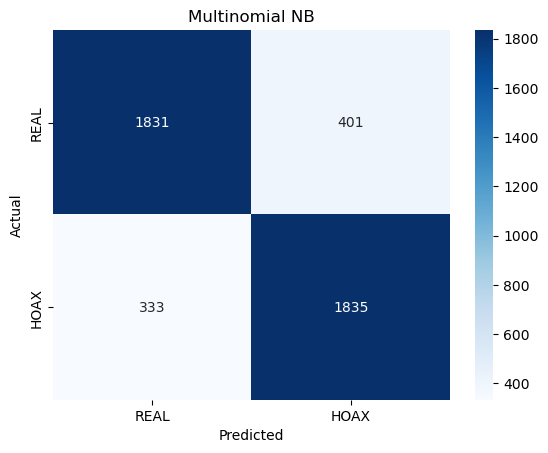

Accuracy: 0.8331818181818181
Precision: 0.8206618962432916
Recall: 0.8464022140221402
F1 Score: 0.8333333333333334


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['REAL', 'HOAX'], yticklabels=['REAL', 'HOAX'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multinomial NB')
plt.show()

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
y_train.shape

(13200,)

##### Passive Aggressive Classifier Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

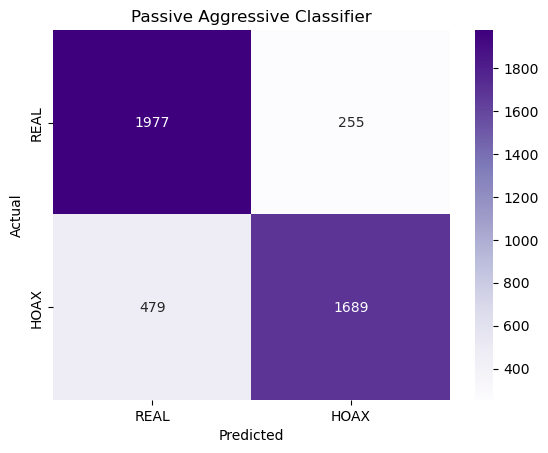

Accuracy: 0.8331818181818181
Precision: 0.8688271604938271
Recall: 0.7790590405904059
F1 Score: 0.8214980544747083


In [ ]:
# Make predictions on the test set
linear_clf.fit(X_train, y_train)
y_pred2 = linear_clf.predict(X_test)

# Calculate metrics
accuracy = metrics.accuracy_score(y_test, y_pred2)
precision = metrics.precision_score(y_test, y_pred2)
recall = metrics.recall_score(y_test, y_pred2)
f1 = metrics.f1_score(y_test, y_pred2)

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred2)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', xticklabels=['REAL', 'HOAX'], yticklabels=['REAL', 'HOAX'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Passive Aggressive Classifier')
plt.show()

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

##### Multinomial Classifier with Hyperparameter

In [ ]:
classifier=MultinomialNB(alpha=0.1)

/Users/muhammadiqbal/anaconda3/lib/python3.10/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/muhammadiqbal/anaconda3/lib/python3.10/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


MultinomialNB with Hyperparameter
Alpha: 0.0, Precision: 0.822, Recall: 0.842, F1: 0.832
MultinomialNB with Hyperparameter
Alpha: 0.1, Precision: 0.822, Recall: 0.842, F1: 0.832
MultinomialNB with Hyperparameter
Alpha: 0.2, Precision: 0.823, Recall: 0.845, F1: 0.834
MultinomialNB with Hyperparameter
Alpha: 0.30000000000000004, Precision: 0.823, Recall: 0.845, F1: 0.834
MultinomialNB with Hyperparameter
Alpha: 0.4, Precision: 0.823, Recall: 0.845, F1: 0.833
MultinomialNB with Hyperparameter
Alpha: 0.5, Precision: 0.823, Recall: 0.845, F1: 0.834
MultinomialNB with Hyperparameter
Alpha: 0.6000000000000001, Precision: 0.822, Recall: 0.844, F1: 0.833
MultinomialNB with Hyperparameter
Alpha: 0.7000000000000001, Precision: 0.822, Recall: 0.845, F1: 0.833
MultinomialNB with Hyperparameter
Alpha: 0.8, Precision: 0.821, Recall: 0.845, F1: 0.833
MultinomialNB with Hyperparameter
Alpha: 0.9, Precision: 0.821, Recall: 0.845, F1: 0.833
Best Alpha: 0.30000000000000004
Best F1-score: 0.833674630261660

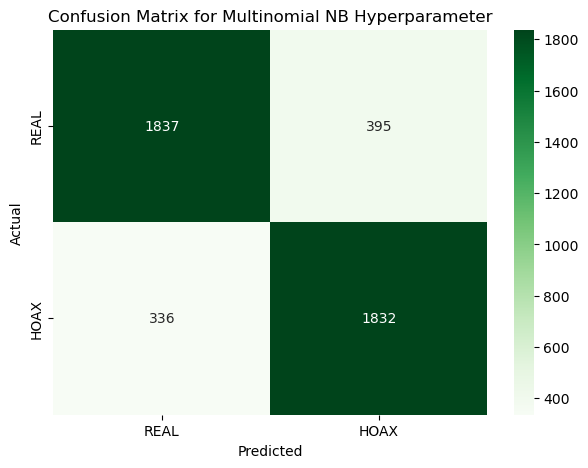

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Assuming you have X_train_resampled, X_test, y_train_resampled, and y_test

best_alpha = 0
previous_f1 = 0

for alpha in np.arange(0, 1, 0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred3 = sub_classifier.predict(X_test)

    precision = metrics.precision_score(y_test, y_pred3)
    recall = metrics.recall_score(y_test, y_pred3)
    f1 = metrics.f1_score(y_test, y_pred3)

    # You can choose a metric for comparison, here using F1-score
    score = f1

    if score > previous_f1:
        classifier = sub_classifier
        best_alpha = alpha
        previous_f1 = score
    print("MultinomialNB with Hyperparameter")
    print("Alpha: {}, Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}".format(alpha, precision, recall, f1))

# Print the best alpha and its corresponding F1-score
print("Best Alpha:", best_alpha)
print("Best F1-score:", previous_f1)

# Confusion Matrix
cm = confusion_matrix(y_test, classifier.predict(X_test))

# Plot Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels=['REAL', 'HOAX'], yticklabels=['REAL', 'HOAX'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial NB Hyperparameter')
plt.show()

In [ ]:
## get features names
feature_names = tv.get_feature_names_out()

In [ ]:
# Assuming you've already trained the MultinomialNB classifier
feature_log_probs = classifier.feature_log_prob_

# Access the log probabilities for the first class (class 0)
class_0_log_probs = feature_log_probs[0]

# Access the log probabilities for the second class (class 1)
class_1_log_probs = feature_log_probs[1]

# Now, you can analyze or use these probabilities as needed

In [ ]:
import numpy as np

probabilities_class_0 = np.exp(class_0_log_probs)
probabilities_class_1 = np.exp(class_1_log_probs)

print("Probabilities for Class 0:", probabilities_class_0)
print("Probabilities for Class 1:", probabilities_class_1)

Probabilities for Class 0: [8.12272686e-04 1.04210472e-03 7.54675470e-04 1.07553207e-03
 4.94206965e-04 6.61117110e-04 2.42727422e-04 6.86231097e-04
 2.41830473e-04 1.29165431e-03 1.39627747e-03 1.20969902e-03
 3.59539875e-04 9.45507814e-04 1.54345828e-03 6.24047915e-04
 1.37519770e-03 1.18923543e-03 2.26200556e-04 2.13363368e-05
 2.13363368e-05 2.13363368e-05 2.13363368e-05 9.21663733e-04
 3.22780634e-04 6.65765429e-04 2.78970147e-03 3.62800066e-04
 1.26249500e-04 1.50816293e-03 1.98589506e-03 9.73631669e-04
 4.42058966e-04 3.75616612e-04 1.75900675e-04 2.08548352e-04
 1.75013494e-04 3.69231384e-03 3.17541065e-04 7.11592197e-04
 1.67822023e-03 3.34481919e-04 1.02778665e-03 9.59303642e-04
 1.84894115e-03 6.16933180e-04 6.41824933e-04 8.74762102e-04
 7.74135570e-04 3.24351619e-03 1.16113203e-03 1.24893118e-04
 1.06667144e-03 1.38246789e-03 1.15535839e-03 8.30779173e-04
 8.44320478e-04 5.30528894e-05 7.89602757e-04 3.55870357e-03
 8.37776750e-04 6.63357213e-04 8.40602344e-04 8.49362782e-

### Using Deep Learning (LSTM, BI-LSTM, GRU, BI-GRU)

In [ ]:
# Gensim untuk import fasttext
pip install gensim

SyntaxError: invalid syntax (3233795751.py, line 2)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
messages=df.copy()

In [ ]:
X=messages['Title']

In [ ]:
## Get the Dependent features
y=messages['label']

In [ ]:
messages['Title'][1]

'KPU Luncurkan Sipol untuk Pendaftaran Parpol di Pemilu 2024'

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['Title'][i])
    review = review.lower()
    review = review.split()

    review = [word for word in review if not word in stopwords.words('indonesian')]
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
corpus[3]

['luhut', 'tolak', 'tawaran', 'cawapres', 'pendamping', 'anies']

In [ ]:
# fasttext untuk vector presentation untuk tiap kata dalam corpus
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for pybind11>=2.2 from https://files.pythonhosted.org/packages/06/55/9f73c32dda93fa4f539fafa268f9504e83c489f460c380371d94296126cd/pybind11-2.11.1-py3-none-any.whl.metadata
  Using cached pybind11-2.11.1-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-macosx_13_0_arm64.whl size=278013 sha256=a492f044c47496bb42f0fb88e9d60b5b5fe9b7a5003c16861dba2ef4d16344f8
  Stored in directory: /Users/muhammadiqbal/Library/Caches/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import fasttext.util
fasttext.util.download_model('id', if_exists='ignore')  # indonesia
model = fasttext.load_model('cc.id.300.bin')

pre-trained word vectors for 157 languages, trained on Common Crawl and Wikipedia using fastText.
link cc.id.300.bin: https://fasttext.cc/docs/en/crawl-vectors.html

In [ ]:
model.get_nearest_neighbors("lele")

[(0.7732262015342712, 'lele.'),
 (0.7507301568984985, 'gurame'),
 (0.7414467930793762, 'lele-lele'),
 (0.713494062423706, 'gurameh'),
 (0.7072216272354126, 'dumbo'),
 (0.704247236251831, 'gurami'),
 (0.6990297436714172, 'ikan'),
 (0.6909825801849365, 'guramih'),
 (0.6899937987327576, 'belut'),
 (0.6807989478111267, 'patin')]

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Convert the words in your corpus to their corresponding tokens.
sequences = tokenizer.texts_to_sequences(corpus)
# sequences

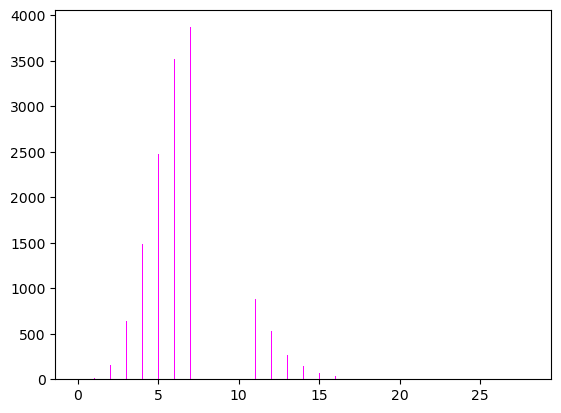

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(x) for x in sequences], bins=700, color='magenta')
plt.show()

In [ ]:
import numpy as np
# Assuming `sequences` is a list of lists, where each inner list is a sequence
sequence_lengths = [len(seq) for seq in sequences]

# Compute the maximum length of all sequences
max_length = np.max(sequence_lengths)

# Compute the length that 90% of sequences are shorter than
max_length_90_percentile = np.percentile(sequence_lengths, 90)

print(f"Max sequence length: {max_length}")
print(f"90th percentile sequence length: {max_length_90_percentile}")

Max sequence length: 28
90th percentile sequence length: 10.0


In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Pad the sequences so they all have the same length
padded_sequences = pad_sequences(sequences, padding='pre', maxlen=229)
padded_sequences

array([[    0,     0,     0, ...,   178,   336,    85],
       [    0,     0,     0, ...,   822,   336,    28],
       [    0,     0,     0, ..., 11923,  3731,  8353],
       ...,
       [    0,     0,     0, ...,    71,   827,    55],
       [    0,     0,     0, ...,  4762,   851,  1453],
       [    0,     0,     0, ...,  4413,   108,     4]], dtype=int32)

#### FASTTEXT EMBEDDING



In [ ]:
# Get the FastText word vectors for our vocabulary
import numpy as np
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 300))  # Assuming FastText vectors are 300-dimensional
for word, i in tokenizer.word_index.items():
    embedding_matrix[i] = model.get_word_vector(word)

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03027716, -0.06882651, -0.01044645, ...,  0.01584953,
         0.00921974,  0.02271144],
       [ 0.0108145 ,  0.02918351,  0.00111052, ..., -0.08132832,
         0.01685037,  0.04678202],
       ...,
       [ 0.01375731,  0.01035818,  0.02425158, ...,  0.02595503,
         0.00574557,  0.01818551],
       [ 0.00882672,  0.00816098,  0.02810455, ..., -0.05882828,
         0.00612711,  0.06788809],
       [-0.03956962,  0.11677349,  0.04325995, ..., -0.01959302,
         0.00980755,  0.07248191]])

In [ ]:
len(embedding_matrix),y.shape

(20390, (22000,))

#### Split data


In [ ]:
import numpy as np
# Set the random seed
random_seed = 42
np.random.seed(random_seed)

In [ ]:
import numpy as np
X_final=np.array(padded_sequences)
y_final=np.array(y)

In [ ]:
# 10 fold CV
from sklearn.model_selection import train_test_split
#60% data latih, 20% data validasi, dan 20% data uji

# Split data into train and temporary test
X_temp, X_test, y_temp, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Split temporary test data into validation and test data
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [ ]:
# Resample training data using SMOTE
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after resampling
#unique, counts = np.unique(y_train, return_counts=True)
#print("Before resampling:")
#print(dict(zip(unique, counts)))

#unique, counts = np.unique(y_train_resampled, return_counts=True)
#print("After resampling:")
#print(dict(zip(unique, counts)))


### Model Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os
import random
import tensorflow as tf
import numpy as np

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Assume `embedding_matrix` is the matrix you've created from your FastText model
embedding_vector_features = embedding_matrix.shape[1]  # This should be the dimension of the FastText embeddings
voc_size = len(tokenizer.word_index) + 1  # This should be the number of unique words in your texts
max_length = 229  # This should be the maximum length of your tokenized sequences

def create_model(rnn_layer):
    model = Sequential()
    model.add(Embedding(voc_size,
                        embedding_vector_features,
                        weights=[embedding_matrix],
                        input_length=max_length,
                        trainable=True))
    model.add(rnn_layer(128))  # RNN layer (LSTM, Bidirectional LSTM, or GRU)
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))  # Regularized Dense layer before output
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Performance Metrics and Accuracy using shuffle = True

Epoch 1/10
52/52 [==============================] - 32s 608ms/step - loss: 1.0762 - accuracy: 0.7720 - val_loss: 0.6444 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 2/10
52/52 [==============================] - 34s 664ms/step - loss: 0.4076 - accuracy: 0.9384 - val_loss: 0.3677 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 3/10
52/52 [==============================] - 34s 661ms/step - loss: 0.1912 - accuracy: 0.9743 - val_loss: 0.3475 - val_accuracy: 0.9086 - lr: 0.0010
Epoch 4/10
52/52 [==============================] - ETA: 0s - loss: 0.0908 - accuracy: 0.9875
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
52/52 [==============================] - 36s 697ms/step - loss: 0.0908 - accuracy: 0.9875 - val_loss: 0.3296 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 5/10
52/52 [==============================] - 37s 701ms/step - loss: 0.0465 - accuracy: 0.9961 - val_loss: 0.3543 - val_accuracy: 0.9032 - lr: 5.0000e-04
Epoch 6/10
52/52 [==============================] - ETA: 

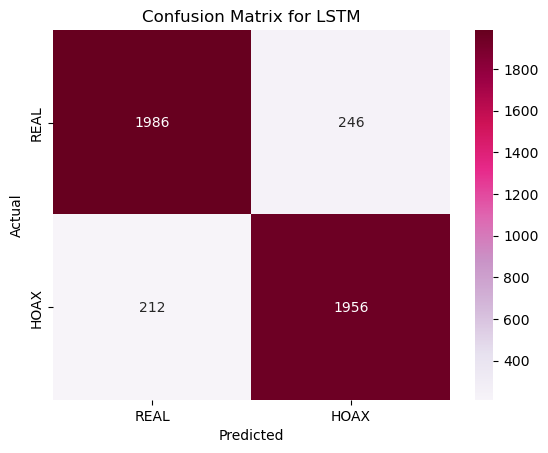

Accuracy for LSTM: 0.8959090909090909
Classification Report for LSTM:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      2232
           1       0.89      0.90      0.90      2168

    accuracy                           0.90      4400
   macro avg       0.90      0.90      0.90      4400
weighted avg       0.90      0.90      0.90      4400



In [ ]:
batch_size = 256
epochs = 10
embed_size = 100
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

lstm_layer = LSTM
lstm_layer_name = 'LSTM'
model = create_model(lstm_layer)
model.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_val, y_val), epochs=epochs, callbacks=[learning_rate_reduction, early_stopping])
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='PuRd', xticklabels=['REAL', 'HOAX'], yticklabels=['REAL', 'HOAX'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {lstm_layer_name}')
plt.show()

print(f'Accuracy for {lstm_layer_name}: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report for {lstm_layer_name}:\n {classification_report(y_test, y_pred)}')

Epoch 1/10
52/52 [==============================] - 52s 987ms/step - loss: 1.1157 - accuracy: 0.7613 - val_loss: 0.5875 - val_accuracy: 0.8877 - lr: 0.0010
Epoch 2/10
52/52 [==============================] - 57s 1s/step - loss: 0.3646 - accuracy: 0.9395 - val_loss: 0.3274 - val_accuracy: 0.9166 - lr: 0.0010
Epoch 3/10
52/52 [==============================] - 59s 1s/step - loss: 0.1341 - accuracy: 0.9784 - val_loss: 0.2983 - val_accuracy: 0.9123 - lr: 0.0010
Epoch 4/10
52/52 [==============================] - ETA: 0s - loss: 0.0634 - accuracy: 0.9892
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
52/52 [==============================] - 59s 1s/step - loss: 0.0634 - accuracy: 0.9892 - val_loss: 0.3339 - val_accuracy: 0.9036 - lr: 0.0010
Epoch 5/10
52/52 [==============================] - 51s 988ms/step - loss: 0.0333 - accuracy: 0.9956 - val_loss: 0.3570 - val_accuracy: 0.9030 - lr: 5.0000e-04
Epoch 6/10
52/52 [==============================] - ETA: 0s - loss

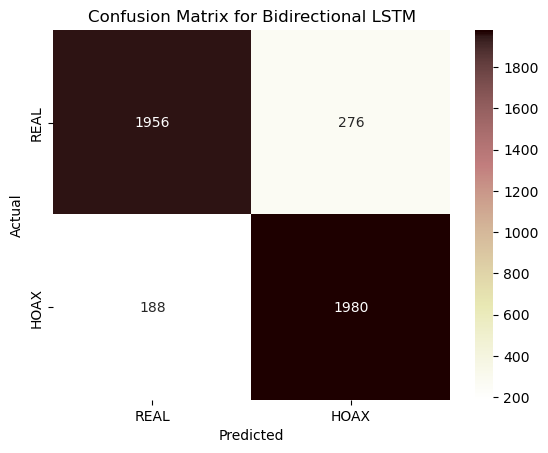

Accuracy for Bidirectional LSTM: 0.8945454545454545
Classification Report for Bidirectional LSTM:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      2232
           1       0.88      0.91      0.90      2168

    accuracy                           0.89      4400
   macro avg       0.89      0.89      0.89      4400
weighted avg       0.90      0.89      0.89      4400



In [ ]:
bi_lstm_layer = lambda x: Bidirectional(LSTM(x))
bi_lstm_layer_name = 'Bidirectional LSTM'
model = create_model(bi_lstm_layer)
model.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_val, y_val), epochs=epochs, callbacks=[learning_rate_reduction, early_stopping])
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='pink_r', xticklabels=['REAL', 'HOAX'], yticklabels=['REAL', 'HOAX'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {bi_lstm_layer_name}')
plt.show()

print(f'Accuracy for {bi_lstm_layer_name}: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report for {bi_lstm_layer_name}:\n {classification_report(y_test, y_pred)}')

Epoch 1/10
52/52 [==============================] - 36s 691ms/step - loss: 1.0909 - accuracy: 0.7440 - val_loss: 0.6399 - val_accuracy: 0.8836 - lr: 0.0010
Epoch 2/10
52/52 [==============================] - 36s 689ms/step - loss: 0.3982 - accuracy: 0.9370 - val_loss: 0.3629 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 3/10
52/52 [==============================] - 33s 641ms/step - loss: 0.1593 - accuracy: 0.9777 - val_loss: 0.3164 - val_accuracy: 0.9045 - lr: 0.0010
Epoch 4/10
52/52 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.9892
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
52/52 [==============================] - 35s 676ms/step - loss: 0.0722 - accuracy: 0.9892 - val_loss: 0.3129 - val_accuracy: 0.9061 - lr: 0.0010
Epoch 5/10
52/52 [==============================] - 37s 706ms/step - loss: 0.0354 - accuracy: 0.9960 - val_loss: 0.3450 - val_accuracy: 0.9050 - lr: 5.0000e-04
Epoch 6/10
52/52 [==============================] - ETA: 

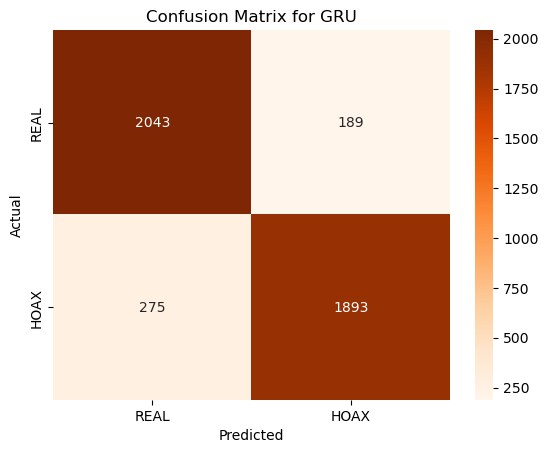

Accuracy for GRU: 0.8945454545454545
Classification Report for GRU:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2232
           1       0.91      0.87      0.89      2168

    accuracy                           0.89      4400
   macro avg       0.90      0.89      0.89      4400
weighted avg       0.90      0.89      0.89      4400



In [ ]:
gru_layer = GRU
gru_layer_name = 'GRU'
model = create_model(gru_layer)
model.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_val, y_val), epochs=epochs, callbacks=[learning_rate_reduction, early_stopping])
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges', xticklabels=['REAL', 'HOAX'], yticklabels=['REAL', 'HOAX'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {gru_layer_name}')
plt.show()

print(f'Accuracy for {gru_layer_name}: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report for {gru_layer_name}:\n {classification_report(y_test, y_pred)}')

Epoch 1/10
52/52 [==============================] - 42s 793ms/step - loss: 1.1250 - accuracy: 0.7532 - val_loss: 0.5771 - val_accuracy: 0.8934 - lr: 0.0010
Epoch 2/10
52/52 [==============================] - 41s 785ms/step - loss: 0.3498 - accuracy: 0.9408 - val_loss: 0.3179 - val_accuracy: 0.9109 - lr: 0.0010
Epoch 3/10
52/52 [==============================] - 41s 788ms/step - loss: 0.1233 - accuracy: 0.9794 - val_loss: 0.3011 - val_accuracy: 0.9089 - lr: 0.0010
Epoch 4/10
52/52 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 0.9902
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
52/52 [==============================] - 41s 786ms/step - loss: 0.0553 - accuracy: 0.9902 - val_loss: 0.3218 - val_accuracy: 0.9020 - lr: 0.0010
Epoch 5/10
52/52 [==============================] - 41s 782ms/step - loss: 0.0276 - accuracy: 0.9971 - val_loss: 0.3475 - val_accuracy: 0.9066 - lr: 5.0000e-04
Epoch 6/10
52/52 [==============================] - ETA: 

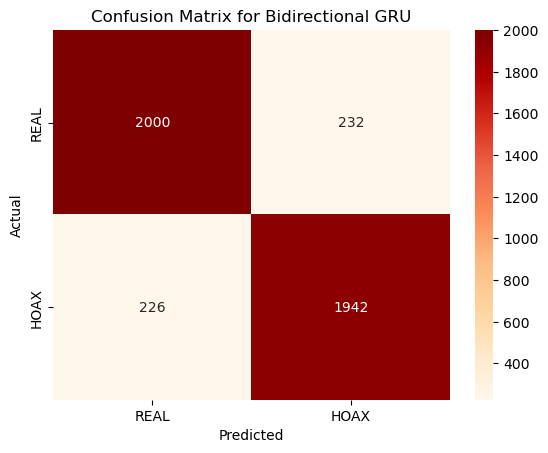

Accuracy for Bidirectional GRU: 0.8959090909090909
Classification Report for Bidirectional GRU:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      2232
           1       0.89      0.90      0.89      2168

    accuracy                           0.90      4400
   macro avg       0.90      0.90      0.90      4400
weighted avg       0.90      0.90      0.90      4400



In [ ]:
bi_gru_layer = lambda x: Bidirectional(GRU(x))
bi_gru_layer_name = 'Bidirectional GRU'
model = create_model(bi_gru_layer)
model.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_val, y_val), epochs=epochs, callbacks=[learning_rate_reduction, early_stopping])
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='OrRd', xticklabels=['REAL', 'HOAX'], yticklabels=['REAL', 'HOAX'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {bi_gru_layer_name}')
plt.show()

print(f'Accuracy for {bi_gru_layer_name}: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report for {bi_gru_layer_name}:\n {classification_report(y_test, y_pred)}')